# KMeans Clustring

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.shape

(200, 5)

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Changing the Columns Name
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spending']

In [9]:
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

# Create X Features

In [13]:
X = df[['Income', 'Spending']]

In [14]:
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Visualizing The Variables

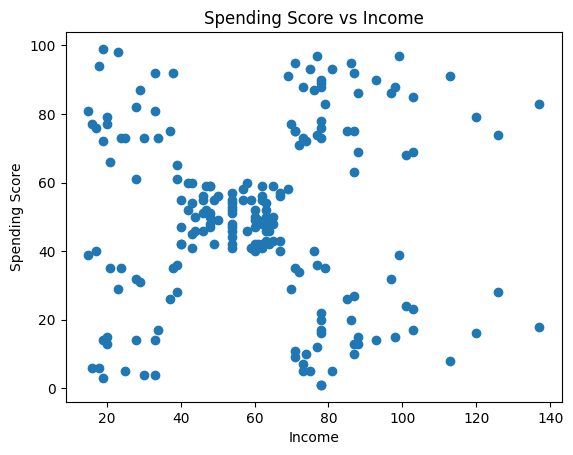

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X['Income'],X['Spending'])
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Spending Score vs Income')
plt.show()

# Preprocessing the X Features

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [17]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())])

In [18]:
X_pre = num_pipe.fit_transform(X)

In [20]:
X_pre[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [21]:
cols = num_pipe.get_feature_names_out()
cols

array(['Income', 'Spending'], dtype=object)

In [22]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


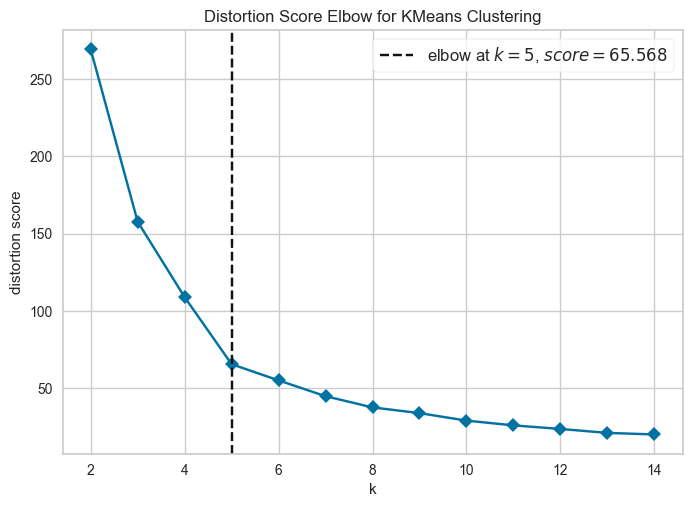

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [34]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans
kelbow_visualizer(KMeans(),
                    X_pre,
                    k=(2,15),
                    timings=False)

# Build The KMeans Algorithms with k=5

In [46]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [47]:
lb = model.labels_
lb

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [48]:
X['Lable']=lb

In [50]:
X

,Income,Spending,lable,Lable
0,15,39,4,4
1,15,81,3,3
2,16,6,4,4
3,16,77,3,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,1
196,126,28,2,0
197,126,74,1,1
198,137,18,2,0


# Visualize the Clusters

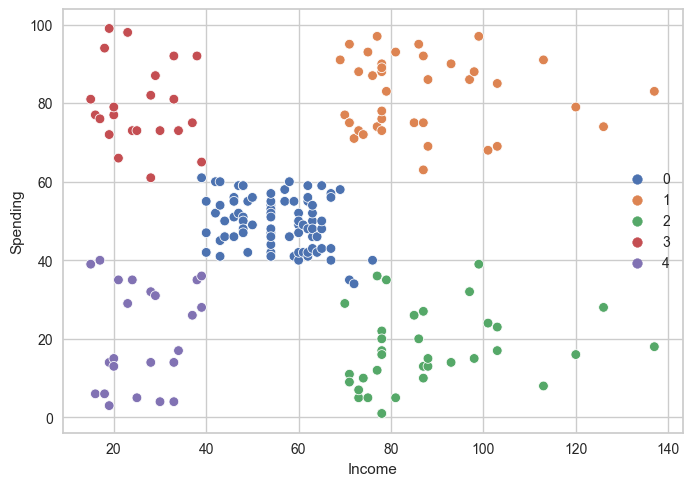

In [29]:
import seaborn as sns
sns.scatterplot(data=X, x='Income', y='Spending', hue=lb, palette='deep')
plt.show()